In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sg
import scipy.optimize

### Обрати внимание на mask - так оставляю только часть коэффициентов

In [12]:
def classic(x,y,delim=1):
    return np.sin((x**2 + y**2)/delim**2)

def classic_dfdx(x,y,delim=1):
    return 2*x/delim**2*np.cos((x/delim)**2 + (y/delim)**2)

def classic_dfdy(x,y, delim=1):
    return 2*y/delim**2*np.cos((x/delim)**2 + (y/delim)**2)

class NatDiff:
    def __init__(self, bound, num, func, dfdx, dfdy):
        linsp = np.linspace(-num, num, 2*num+1)
        self.x, self.y = np.meshgrid(linsp, linsp)
        self.num_f = func(self.x, self.y, num/bound)
        self.num_dfdx = dfdx(self.x, self.y, num/bound)
        self.num_dfdy = dfdy(self.x, self.y, num/bound)
        self.num = num
    def set_core_size(self, core_size):
        self.core_size = core_size
    def get_conv(self,arg):
        # ВОТ СЮДА !!!!!!!!!!!!
        mask = np.array([
            [0,1,0],
            [1,0,1],
            [0,1,0]])
        core = np.repeat(arg, self.core_size)
        core = core.reshape((self.core_size,self.core_size)).T * mask
        return sg.convolve2d(self.num_f, core, mode='same', boundary='symm')
    def delta_dif(self, arg, array):
        return np.linalg.norm(array - self.get_conv(arg))/self.num**2
    def delta_dfdx(self, core):
        return self.delta_dif(core, self.num_dfdx)
    def delta_dfdy(self, core):
        return self.delta_dif(core, self.num_dfdy)
    
    def optimize_core(self):
        starting_approx = 1./self.core_size**2 * np.ones((self.core_size, 1))
        def get_opt_result(fun):
            return scipy.optimize.minimize(fun, starting_approx, method="BFGS")
        A = get_opt_result(self.delta_dfdx)
        B = get_opt_result(self.delta_dfdy)
        return A,B
        

In [13]:
nd = NatDiff(2 ,300,classic,classic_dfdx, classic_dfdy)

In [14]:
nd.set_core_size(3)
X,Y = nd.optimize_core()

In [15]:
import matplotlib.pyplot as plt

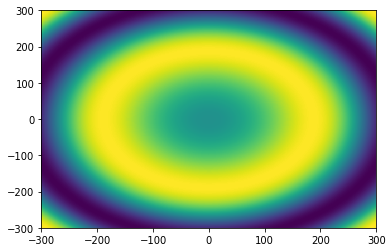

In [16]:
plt.pcolormesh(nd.x, nd.y, nd.num_f)

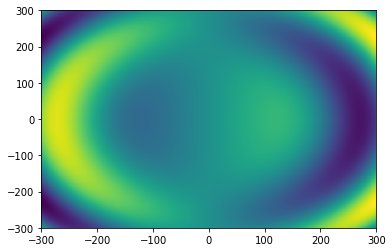

In [17]:
plt.pcolormesh(nd.x, nd.y, nd.num_dfdx)

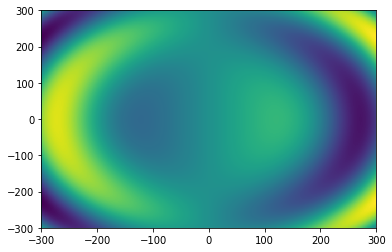

In [18]:
plt.pcolormesh(nd.x, nd.y, nd.get_conv(X.x))

In [19]:
np.linalg.norm(nd.get_conv(X.x) - nd.num_dfdx)/nd.num**2

3.1164325993505345e-06

### Картинки совпадают и по норме всё окей, но результат - дурацкий какой-то. Боюсь, что выбор функции как-то влияет. Если четко оставить только 2 ненулевых члена в mask, то будет +1/2 и -1/2, но если дать чуть больше свободы, то получается бред

In [20]:
X.x

array([ 0.53789074, -0.03695475, -0.46398125])

In [356]:
mask = np.array([
            [0,1,0],
            [1,0,1],
            [0,1,0]])
core = np.repeat(Y.x, 3)
core = core.reshape((3,3)) * mask
DFDX = sg.convolve2d(nd.num_f, core, mode='same', boundary='symm')

In [139]:
np.repeat(np.array([1,2,3]).reshape((1,3)),3,axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [137]:
np.array([1,2,3]).reshape((3,1))

array([[1],
       [2],
       [3]])

In [355]:
mask = np.array([
            [0,1,0],
            [1,0,1],
            [0,1,0]])
core = np.repeat(Y.x, 3)
core = core.reshape((3,3)) * mask

In [280]:
core

array([[ 0.00000000e+00,  1.04235037e-01,  0.00000000e+00],
       [ 3.01484718e-07,  3.01484718e-07,  3.01484718e-07],
       [-0.00000000e+00, -1.04235345e-01, -0.00000000e+00]])

In [201]:
np.linspace(-1,1,21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [238]:
print(nd.x[0])

[-1000.  -999.  -998. ...   998.   999.  1000.]
